

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>




<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Trabalho muito sólido com o projeto! Gostei muito.
    
    
Parabéns pela aprovação e até breve!
</div>

# Analise Exploratoria de Livros e Engajamento de Usuarios com SQL

# Introducao

A pandemia do coronavírus pegou o mundo de surpresa, alterando completamente a rotina de todos. As pessoas passaram a ficar mais em casa e a dedicar mais tempo à leitura de livros, o que chamou a atenção de diversas startups que rapidamente desenvolveram aplicativos voltados para amantes da leitura.

## Descricao dos dados
books — livros:

Contém dados sobre livros:

book_id — identificador do livro
author_id — identificador do autor
title — título
num_pages — número de páginas
publication_date — data de publicação
publisher_id — identificador da editora
authors — autores:

Contém dados sobre os autores:

author_id — identificador do autor
author — autor
publishers — editoras:

Contém dados sobre editoras:

publisher_id — identificador da editora
publisher — editora
ratings — classificações:

Contém dados sobre classificação dos usuários:

rating_id — identificador da classificação
book_id — identificador do livro
username — o nome do usuário que avaliou o livro
rating — classificação
reviews — avaliação:

Contém dados sobre revisão dos clientes:

review_id — identificador da revisão
book_id — identificador do livro
username — o nome do usuário que revisou o livro
text — o texto da revisão

### Importando Dataset

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
db_config = {'user': 'practicum_student',         # nome de usuário
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs',  # senha
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,                       # porta de conexão
             'db': 'data-analyst-final-project-db'}  # nome do banco de dados

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                         db_config['pwd'],
                                                         db_config['host'],
                                                         db_config['port'],
                                                         db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})


In [3]:
# Exemplo de consulta SQL
sample_query = 'SELECT * FROM books'

# Lendo os dados da consulta e armazenando em um DataFrame
df = pd.io.sql.read_sql(sample_query, con=engine)

# Exibindo o DataFrame
print(df)

     book_id  author_id                                              title  \
0          1        546                                       'Salem's Lot   
1          2        465                 1 000 Places to See Before You Die   
2          3        407  13 Little Blue Envelopes (Little Blue Envelope...   
3          4         82  1491: New Revelations of the Americas Before C...   
4          5        125                                               1776   
..       ...        ...                                                ...   
995      996        571           Wyrd Sisters (Discworld  #6; Witches #2)   
996      997        454                        Xenocide (Ender's Saga  #3)   
997      998        201                                    Year of Wonders   
998      999         94                        You Suck (A Love Story  #2)   
999     1000        509  Zen and the Art of Motorcycle Maintenance: An ...   

     num_pages publication_date  publisher_id  
0          594 

# Exploracao Inicial das Tabelas

## Exploração inicial dos dados

Nesta etapa, foi realizada uma exploracao inicial das tabelas do banco de dados, com o objetivo de compreender sua estrutura, identificar os principais campos e entender como elas se relacionam entre si no contexto do modelo relacional.

In [4]:

# Listando todas as tabelas
query = """
SELECT table_name
FROM information_schema.tables
WHERE table_schema = 'public';
"""
pd.read_sql(query, engine)


,table_name
0,advertisment_costs
1,authors
2,books
3,check_avg
4,orders
5,publishers
6,ratings
7,reviews
8,visits


In [5]:
# Visualizando as primeiras linhas
query = "SELECT * FROM books LIMIT 5;"
pd.read_sql(query, engine)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


## Relacao entre as tabelas

O banco de dados possui um modelo relacional no qual a tabela `books` é central.

- A tabela `books` armazena informacoes principais dos livros e se relaciona com a tabela `authors` por meio da coluna `author_id`, que identifica o autor de cada livro.
- A tabela `books` também se relaciona com a tabela `publishers` atraves da coluna `publisher_id`, que indica a editora responsavel pela publicacao.
- As tabelas `ratings` e `reviews` estao relacionadas à tabela `books` pela coluna `book_id`, permitindo associar avaliacoes e resenhas a cada livro.
- A tabela `ratings` contem avaliacoes numericas feitas pelos usuarios.
- A tabela `reviews` contem os textos das resenhas escritas pelos usuarios.

# Consultas do Exercicio

## Livros publicados apos 1º de janeiro de 2000

Nesta analise, buscamos identificar quantos livros foram publicados apos 1º de janeiro de 2000, considerando a data de publicacao registrada no banco de dados.

In [6]:
query = """
SELECT COUNT(*) AS total_livros
FROM books
WHERE publication_date > '2000-01-01';
"""
pd.read_sql(query, engine)

,total_livros
0,819


### Conclusao

A consulta mostra que 819 livros do banco de dados foram publicados após 1º de janeiro de 2000. Isso indica que a maior parte do catalogo é composta por obras relativamente recentes, o que pode ser relevante para estrategias voltadas a leitores interessados em conteudos contemporaneos.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

A questão está correta!

</div>


## Numero de avaliacoes e classificacao media por livro

Nesta etapa, calculamos para cada livro o total de resenhas feitas por usuarios e a nota media atribuída nas avaliacoes. Consideramos apenas livros que possuem algum tipo de interacao (avaliacao e/ou resenha).

In [7]:
query = """
WITH
rating_stats AS (
    SELECT
        book_id,
        AVG(rating) AS avg_rating
    FROM ratings
    GROUP BY book_id
),
review_stats AS (
    SELECT
        book_id,
        COUNT(*) AS review_count
    FROM reviews
    GROUP BY book_id
)
SELECT
    b.book_id,
    b.title,
    rs.review_count,
    rts.avg_rating
FROM books b
LEFT JOIN review_stats rs ON rs.book_id = b.book_id
LEFT JOIN rating_stats rts ON rts.book_id = b.book_id
WHERE rs.review_count IS NOT NULL
   OR rts.avg_rating IS NOT NULL
ORDER BY b.book_id;
"""
pd.read_sql(query, engine)

,book_id,title,review_count,avg_rating
0,1,'Salem's Lot,2.0,3.666667
1,2,1 000 Places to See Before You Die,1.0,2.500000
2,3,13 Little Blue Envelopes (Little Blue Envelope...,3.0,4.666667
3,4,1491: New Revelations of the Americas Before C...,2.0,4.500000
4,5,1776,4.0,4.000000
...,...,...,...,...
995,996,Wyrd Sisters (Discworld #6; Witches #2),3.0,3.666667
996,997,Xenocide (Ender's Saga #3),3.0,3.400000
997,998,Year of Wonders,4.0,3.200000
998,999,You Suck (A Love Story #2),2.0,4.500000


### Conclusao

A consulta apresenta, para cada livro com interacao dos usuarios, o total de resenhas e a nota media das avaliacoes. Observa-se que os livros possuem niveis variados de engajamento, refletidos tanto na quantidade de resenhas quanto nas notas medias atribuídas pelos usuarios.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

A questão está correta!

</div>



## Editora com mais livros (mais de 50 paginas)

Nesta etapa, identificamos qual editora publicou o maior número de livros com mais de 50 paginas, excluindo folhetos. O resultado retorna apenas a editora lider em quantidade de títulos publicados nesse criterio.

In [8]:
query = """
SELECT
    p.publisher_id,
    p.publisher,
    COUNT(*) AS total_books
FROM books b
JOIN publishers p ON p.publisher_id = b.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher_id, p.publisher
ORDER BY total_books DESC, p.publisher_id
LIMIT 1;
"""
pd.read_sql(query, engine)

,publisher_id,publisher,total_books
0,212,Penguin Books,42


### Conclusao

A analise mostra que a editora Penguin Books é a que publicou o maior numero de livros com mais de 50 paginas no banco de dados, totalizando 42 titulos. Esse resultado indica uma forte presenca dessa editora no catálogo de obras mais extensas, excluindo folhetos.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

A questão está correta!

</div>


## Autor com a maior nota media (livros com pelo menos 50 avaliacoes)

Nesta etapa, identificamos o autor com a maior nota media, considerando apenas livros que possuem pelo menos 50 avaliacoes. Para isso, primeiro filtramos os livros elegiveis (≥ 50 avaliacoes) e, em seguida, calculamos a nota media por autor.

In [9]:
query = """
WITH book_ratings AS (
    SELECT
        b.book_id,
        b.author_id,
        AVG(r.rating) AS book_avg_rating,
        COUNT(r.rating_id) AS rating_count
    FROM books b
    JOIN ratings r ON r.book_id = b.book_id
    GROUP BY b.book_id, b.author_id
),
eligible_books AS (
    SELECT *
    FROM book_ratings
    WHERE rating_count >= 50
),
author_avg AS (
    SELECT
        a.author_id,
        a.author,
        AVG(eb.book_avg_rating) AS author_avg_rating
    FROM eligible_books eb
    JOIN authors a ON a.author_id = eb.author_id
    GROUP BY a.author_id, a.author
)
SELECT author_id, author, author_avg_rating
FROM author_avg
ORDER BY author_avg_rating DESC, author_id
LIMIT 1;
"""
pd.read_sql(query, engine)

,author_id,author,author_avg_rating
0,236,J.K. Rowling/Mary GrandPré,4.283844


### Conclusao

Considerando apenas livros com pelo menos 50 avaliacoes, o autor com a maior nota media é J.K. Rowling/Mary GrandPre, com media aproximada de 4,28. Esse filtro torna a analise mais robusta ao reduzir o efeito de livros com poucas avaliacoes, que poderiam distorcer a media.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

A questão está correta!

</div>


## Media de resenhas com texto entre usuarios muito ativos

Nesta etapa, calculamos a media de resenhas com texto escritas por usuarios que avaliaram mais de 50 livros. Primeiro identificamos os usuarios que avaliaram mais de 50 livros e, em seguida, contamos quantas resenhas com texto cada um desses usuarios escreveu para entao obter a media.


In [10]:
query = """
WITH active_raters AS (
    SELECT
        username
    FROM ratings
    GROUP BY username
    HAVING COUNT(DISTINCT book_id) > 50
),
text_reviews_per_user AS (
    SELECT
        r.username,
        COUNT(*) AS text_review_count
    FROM reviews r
    JOIN active_raters ar ON ar.username = r.username
    WHERE r.text IS NOT NULL
      AND r.text <> ''
    GROUP BY r.username
)
SELECT
    AVG(text_review_count) AS avg_text_reviews
FROM text_reviews_per_user;
"""
pd.read_sql(query, engine)

,avg_text_reviews
0,24.333333


### Conclusao

A analise indica que usuários que avaliaram mais de 50 livros escrevem, em media, aproximadamente 24 resenhas com texto. Esse resultado sugere que, entre os usuarios mais ativos em avaliações, existe tambem um alto nível de engajamento na producao
de resenhas escritas.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

A questão está correta!

</div>


# Graficos


##  Editoras com mais livros (mais de 50 paginas)

O grafico abaixo apresenta as cinco editoras com o maior numero de livros com mais de 50 paginas, permitindo uma visualizacao rápida da concentracao de titulos por editora.

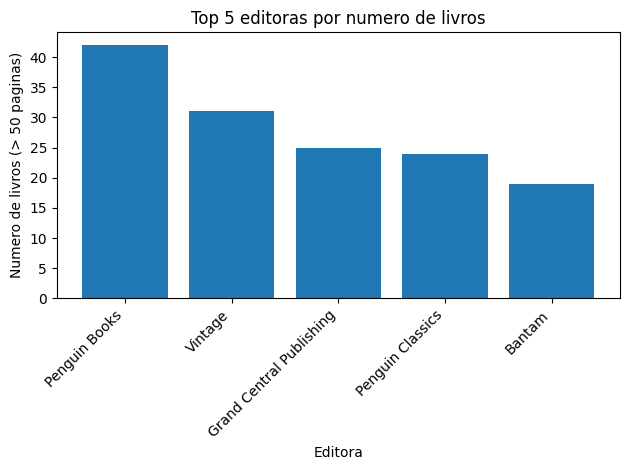

In [11]:
query = """
SELECT
    p.publisher,
    COUNT(*) AS total_books
FROM books b
JOIN publishers p ON p.publisher_id = b.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher
ORDER BY total_books DESC
LIMIT 5;
"""

df_publishers = pd.read_sql(query, engine)

plt.figure()
plt.bar(df_publishers["publisher"], df_publishers["total_books"])
plt.xlabel("Editora")
plt.ylabel("Numero de livros (> 50 paginas)")
plt.title("Top 5 editoras por numero de livros")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Autores com maior nota media

Este grafico apresenta os cinco autores com maior nota media, considerando apenas livros que possuem pelo menos 50 avaliacoes, tornando a comparacao mais robusta.

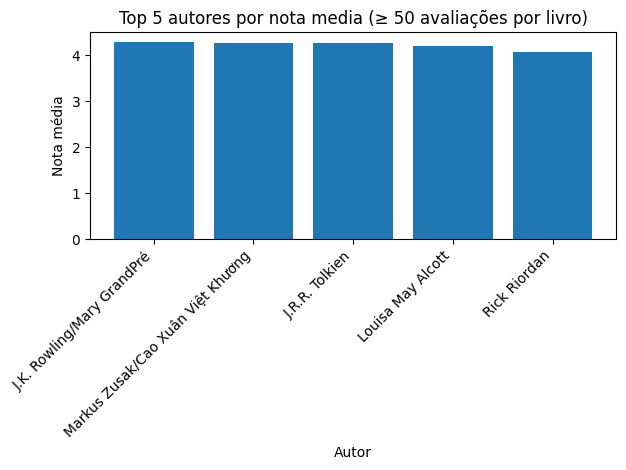

In [12]:
query = """
WITH book_ratings AS (
    SELECT
        b.book_id,
        b.author_id,
        AVG(r.rating) AS book_avg_rating,
        COUNT(r.rating_id) AS rating_count
    FROM books b
    JOIN ratings r ON r.book_id = b.book_id
    GROUP BY b.book_id, b.author_id
),
eligible_books AS (
    SELECT *
    FROM book_ratings
    WHERE rating_count >= 50
),
author_avg AS (
    SELECT
        a.author,
        AVG(eb.book_avg_rating) AS author_avg_rating
    FROM eligible_books eb
    JOIN authors a ON a.author_id = eb.author_id
    GROUP BY a.author
)
SELECT author, author_avg_rating
FROM author_avg
ORDER BY author_avg_rating DESC
LIMIT 5;
"""

df_authors = pd.read_sql(query, engine)

plt.figure()
plt.bar(df_authors["author"], df_authors["author_avg_rating"])
plt.xlabel("Autor")
plt.ylabel("Nota média")
plt.title("Top 5 autores por nota media (≥ 50 avaliações por livro)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Principais conclusoes do estudo

- A maior parte dos livros do banco de dados foi publicada apos o ano 2000, indicando um catalogo predominantemente contemporaneo.
- Todos os livros analisados apresentam algum nível de interacao dos usuários, seja por avaliacoes ou resenhas.
- A editora Penguin Books se destaca como a que publicou o maior numero de livros com mais de 50 paginas.
- Considerando apenas livros com pelo menos 50 avaliacoes, o autor com a maior nota media é J.K. Rowling/Mary GrandPre.
- Usuários que avaliam muitos livros também demonstram alto engajamento na escrita de resenhas, com uma média superior a 24 resenhas com texto por usuario.